In [1]:
import numpy as np 
import pandas as pd 
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import torch
from PIL import Image,ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import warnings
warnings.filterwarnings('ignore')

In [2]:
#GPU CHECK
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available. Training on CPU...')
    device = torch.device('cpu')
else:
    print('CUDA is available. Training on GPU...')
    device = torch.device('cuda:0')

CUDA is available. Training on GPU...


In [3]:
dataset = []
labels = []

In [4]:
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    try:
      img_res=cv2.resize(img,(256,256))
      img_array = img_to_array(img_res)
      img_array = img_array/255.0
      dataset.append(img_array)
      if str(label) == '0':
        labels.append('0')
      else: 
          if str(label) == '1':
            labels.append('1')
          else:
            if str(label) == '2':
              labels.append('1')
            else:
              labels.append('2')
        
    except:
      print("error")

In [5]:
train_Data = pd.read_csv("/content/drive/MyDrive/train.csv")
train_Data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [7]:
id_code_Data=id_code_Data[0:2000]
diagnosis_Data=diagnosis_Data[0:2000]

In [8]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('/content/drive/MyDrive/train_images','{}.png'.format(id_code))
    prepare_Images(diagnosis,path)

2000it [03:57,  8.42it/s]


In [9]:
images = np.array(dataset)
label_arr = np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.20,random_state=44)

In [11]:
y_train= np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

In [12]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
from keras.applications.resnet import preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score

from sklearn.model_selection import train_test_split

input_shape = (128,256, 256, 3)
n_classes = 3

resnet_model = tf.keras.applications.ResNet50(
    input_shape=(256,256,3), 
    include_top=False, 
    weights='imagenet'
)

resnet_model.trainable =False

resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [13]:
resnettrain = tf.keras.Sequential([
    resnet_model,
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

resnettrain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 2048)       8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 16)                2097168   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                        

In [14]:
resnettrain.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [15]:
history = resnettrain.fit(
    x_train,
    y_train,
    batch_size=128,
    verbose=1,
    epochs=100
    
)

Epoch 1/100
13/13 [==============================] - 21s 541ms/step - loss: 1.4739 - accuracy: 0.2950
Epoch 2/100
13/13 [==============================] - 6s 436ms/step - loss: 1.3880 - accuracy: 0.3006
Epoch 3/100
13/13 [==============================] - 6s 430ms/step - loss: 1.3222 - accuracy: 0.3212
Epoch 4/100
13/13 [==============================] - 6s 450ms/step - loss: 1.2828 - accuracy: 0.3131
Epoch 5/100
13/13 [==============================] - 6s 440ms/step - loss: 1.2593 - accuracy: 0.3369
Epoch 6/100
13/13 [==============================] - 6s 453ms/step - loss: 1.2342 - accuracy: 0.3400
Epoch 7/100
13/13 [==============================] - 6s 447ms/step - loss: 1.1981 - accuracy: 0.3700
Epoch 8/100
13/13 [==============================] - 6s 448ms/step - loss: 1.1754 - accuracy: 0.3506
Epoch 9/100
13/13 [==============================] - 6s 472ms/step - loss: 1.1567 - accuracy: 0.3694
Epoch 10/100
13/13 [==============================] - 6s 467ms/step - loss: 1.1480 - accur

In [16]:
pred = resnettrain.predict(x_test)

resnettrain.evaluate(x_test,y_test)

13/13 [==============================] - 3s 119ms/step - loss: 0.7924 - accuracy: 0.8000


[0.7923906445503235, 0.800000011920929]

In [17]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
conMat = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(conMat)

[[178  12   0]
 [ 12 142   0]
 [  1  55   0]]


In [18]:
score = round(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)),2)
print(score)

0.8


<Axes: >

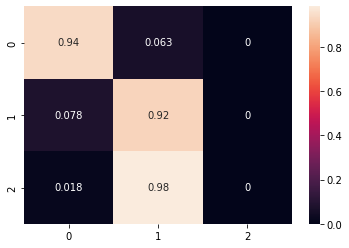

In [19]:
from sklearn.preprocessing import normalize
import seaborn as sns
normed_confusion_matrix = normalize(conMat , axis = 1, norm = 'l1')
cm_df = pd.DataFrame(normed_confusion_matrix)
sns.heatmap (cm_df , annot =True)

In [20]:
report = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       190
           1       0.68      0.92      0.78       154
           2       0.00      0.00      0.00        56

    accuracy                           0.80       400
   macro avg       0.54      0.62      0.57       400
weighted avg       0.70      0.80      0.75       400



Text(0.5, 1.0, 'Training over 100 epochs')

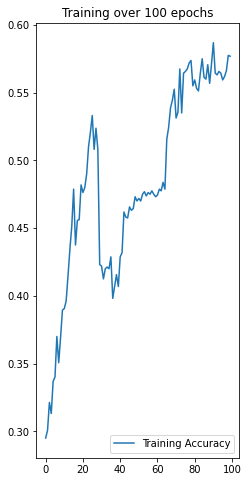

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(100),acc,label='Training Accuracy')
plt.legend(loc="lower right")
plt.title("Training over 100 epochs")

Text(0.5, 1.0, 'Training Loss over 100 epochs')

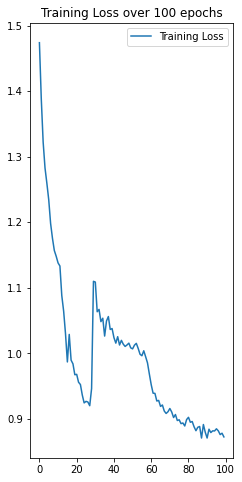

In [22]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(100),loss,label='Training Loss')
plt.legend(loc="upper right")
plt.title("Training Loss over 100 epochs")

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

In [35]:
filePath = '/content/drive/MyDrive/train_images/00cb6555d108.png'
image1 = image.load_img(filePath, target_size = (256, 256))
transformedImage = image.img_to_array(image1)
transformedImage = np.expand_dims(transformedImage, axis = 0)
from tensorflow.keras.applications.resnet50 import preprocess_input
transformedImage = preprocess_input(transformedImage)
prediction = resnettrain.predict(transformedImage)

1/1 [==============================] - 0s 64ms/step


In [37]:
#Create prediction labels from 0-4
alpha="0"
labels=['0-No DR','1-Non Proliferative DR','2-Proliferative DR']
#Search the max value in prediction
labels[np.argmax(prediction)]

'0-No DR'

In [ ]:
# saving the model
import pickle
pickle.dump(resnettrain, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......flatten
.........vars
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............activation_10
...............vars
............activation_11
...............vars
............activation_12
...............vars
............activation_13
...............vars
............activation_14
...............vars
............activation_15
...............vars
............activation_16
...............vars
............activation_17
.........